In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from time import time
import json
import sys

from thorr.utils import read_config

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score

from sklearn.model_selection import KFold, ShuffleSplit, RepeatedKFold, train_test_split, ParameterGrid
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.inspection import permutation_importance

from joblib import dump, load

from permetrics.regression import RegressionMetric

In [2]:
config_path = Path('/Users/gdarkwah/Library/CloudStorage/OneDrive-UW/01-Research/03-HAB/.env/hab_config.ini')
config_dict = read_config(config_path)
project_dir = Path(config_dict["project"]["project_dir"])

Text(0, 0.5, 'R2')

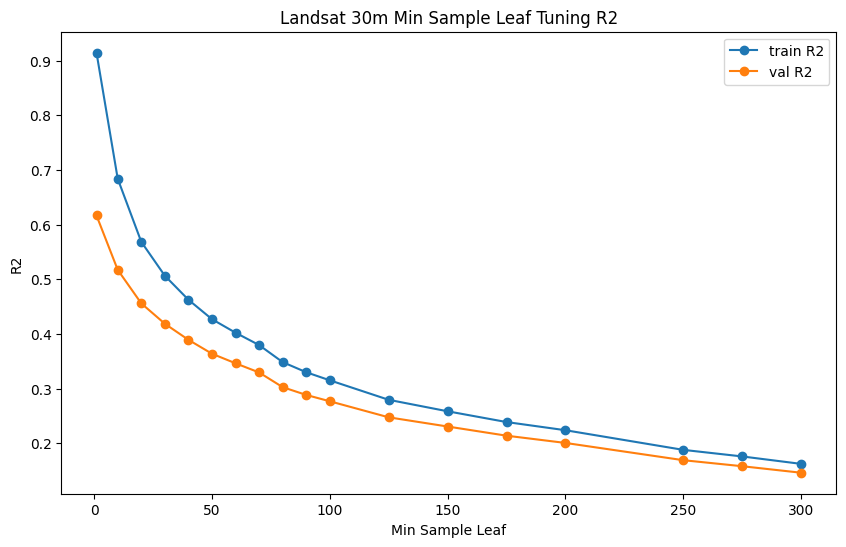

In [3]:
# plot the tuning results
hp_name = 'min_samples_leaf'
tuning_results_df = pd.read_csv(f'{hp_name}_results.csv')
tuning_results_df = tuning_results_df[tuning_results_df['mission'] == 'l30']

fig, ax = plt.subplots(figsize=(10, 6))
for set_type, group_data in tuning_results_df.groupby('set_type'):
    # if set_type == 'train':
    #     pass
    # else:
    #     mean_rmse = group_data.groupby('hypervalue')['R2'].mean()
    #     ax.plot(
    #         mean_rmse.index,
    #         mean_rmse.values,
    #         marker='o',
    #         label=f'{set_type} R2'
    #     )

    mean_rmse = group_data.groupby('hypervalue')['R2'].mean()
    ax.plot(
        mean_rmse.index,
        mean_rmse.values,
        marker='o',
        label=f'{set_type} R2'
    )

ax.legend()
ax.set_title('Landsat 30m Min Sample Leaf Tuning R2')
ax.set_xlabel('Min Sample Leaf')
ax.set_ylabel('R2')

Text(0, 0.5, 'R2')

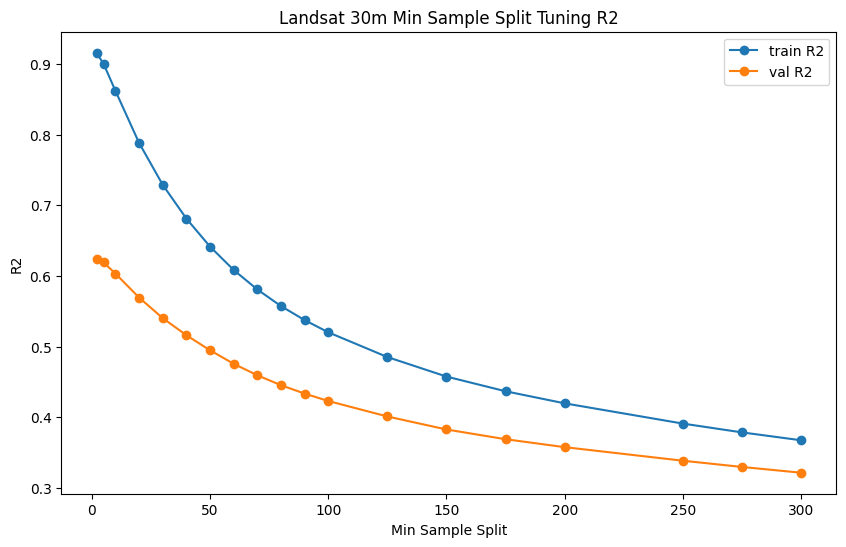

In [4]:
# plot the tuning results
hp_name = 'min_samples_split'
tuning_results_df = pd.read_csv(f'{hp_name}_results.csv')
tuning_results_df = tuning_results_df[tuning_results_df['mission'] == 'l30']

fig, ax = plt.subplots(figsize=(10, 6))
for set_type, group_data in tuning_results_df.groupby('set_type'):
    # if set_type == 'train':
    #     pass
    # else:
    #     mean_rmse = group_data.groupby('hypervalue')['R2'].mean()
    #     ax.plot(
    #         mean_rmse.index,
    #         mean_rmse.values,
    #         marker='o',
    #         label=f'{set_type} R2'
    #     )

    mean_rmse = group_data.groupby('hypervalue')['R2'].mean()
    ax.plot(
        mean_rmse.index,
        mean_rmse.values,
        marker='o',
        label=f'{set_type} R2'
    )

ax.legend()
ax.set_title('Landsat 30m Min Sample Split Tuning R2')
ax.set_xlabel('Min Sample Split')
ax.set_ylabel('R2')

Text(0, 0.5, 'R2')

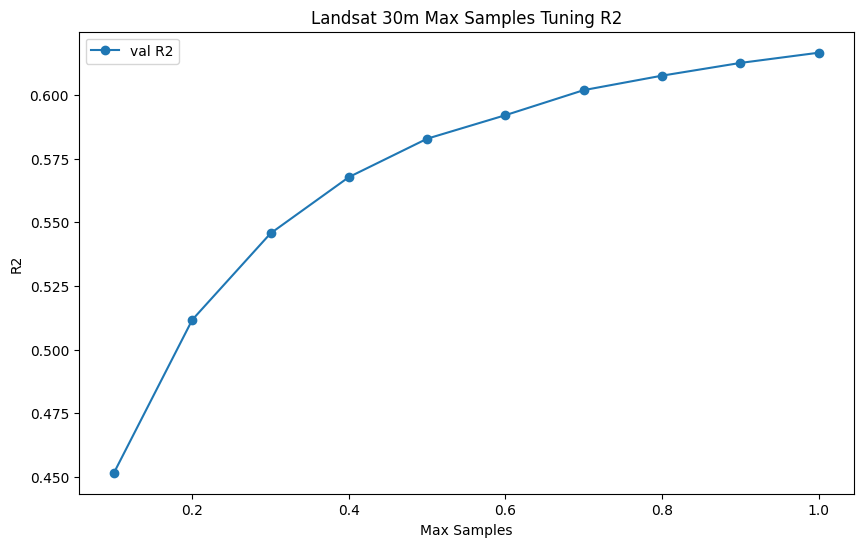

In [8]:
# plot the tuning results
hp_name = 'max_samples'
tuning_results_df = pd.read_csv(f'{hp_name}_results.csv')
tuning_results_df = tuning_results_df[tuning_results_df['mission'] == 'l30']

fig, ax = plt.subplots(figsize=(10, 6))
for set_type, group_data in tuning_results_df.groupby('set_type'):
    if set_type == 'train':
        pass
    else:
        mean_rmse = group_data.groupby('hypervalue')['R2'].mean()
        ax.plot(
            mean_rmse.index,
            mean_rmse.values,
            marker='o',
            label=f'{set_type} R2'
        )

ax.legend()
ax.set_title('Landsat 30m Max Samples Tuning R2')
ax.set_xlabel('Max Samples')
ax.set_ylabel('R2')

Text(0, 0.5, 'R2')

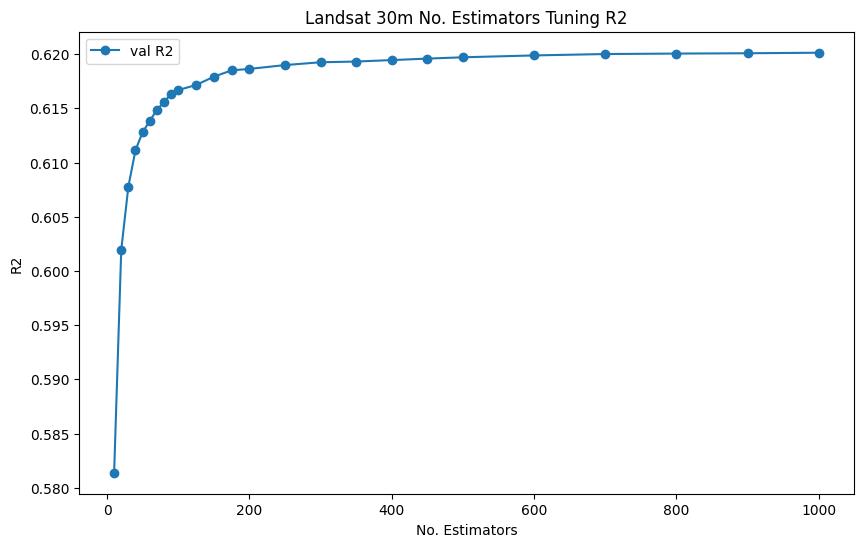

In [9]:
# plot the tuning results
hp_name = 'n_estimators'
tuning_results_df = pd.read_csv(f'{hp_name}_results.csv')
tuning_results_df = tuning_results_df[tuning_results_df['mission'] == 'l30']

fig, ax = plt.subplots(figsize=(10, 6))
for set_type, group_data in tuning_results_df.groupby('set_type'):
    if set_type == 'train':
        pass
    else:
        mean_rmse = group_data.groupby('hypervalue')['R2'].mean()
        ax.plot(
            mean_rmse.index,
            mean_rmse.values,
            marker='o',
            label=f'{set_type} R2'
        )

ax.legend()
ax.set_title('Landsat 30m No. Estimators Tuning R2')
ax.set_xlabel('No. Estimators')
ax.set_ylabel('R2')